<a href="https://colab.research.google.com/github/TrainToGPB/DL_from_Scratch/blob/main/3_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning from Scratch - 3. Neural Network
선요약
* 신경망에서는 활성화 함수로 시그모이드 함수나 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용
* Numpy의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있음
* 기계학습 문제는 크게 회귀와 분류로 나눌 수 있음
* 출력층의 활성화 함수로는, 회귀에서 주로 항등 함수, 분류에서 주로 소프트맥스 함수를 이용
* 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정
* 입력 데이터를 묶은 것을 배치라고 하며, 추론 처리를 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있음

In [1]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [2]:
import numpy as np
import matplotlib.pylab as plt

## Activation Function

### Step function implementation

In [36]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0
"""
이 구현은 쉽지만 인수 x가 실수(부동소수점)만 받아들임
즉, 배열을 인수로 넣을 수 없음
step_function(3.0) (O)
step_function([1.0, 2.0]) (X)
"""

'\n이 구현은 쉽지만 인수 x가 실수(부동소수점)만 받아들임\n즉, 배열을 인수로 넣을 수 없음\nstep_function(3.0) (O)\nstep_function([1.0, 2.0]) (X)\n'

In [37]:
def step_function(x):
  y = x > 0
  return y.astype(np.int) # astype: Numpy function. Can change data type

In [38]:
# Example of numpy's astype function
x = np.array([-1.0, 1.0, 2.0])
print(x)
print("")

y = x > 0
print(y)
y = y.astype(np.int)
print(y)

[-1.  1.  2.]

[False  True  True]
[0 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


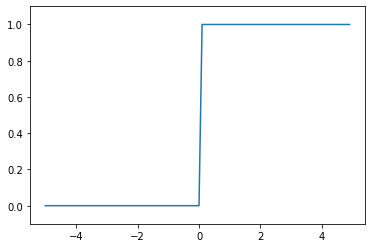

In [39]:
def step_function(x):
  return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid function

[0.26894142 0.73105858 0.88079708]

[2. 3. 4.]
[1.         0.5        0.33333333]



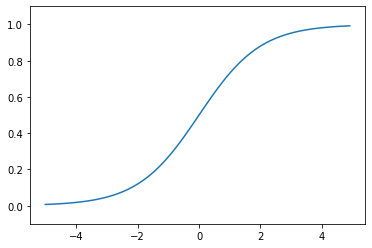

'\n활성화 함수로 선형함수를 이용해버리면, 신경망의 층이 깊어지는 의미가 없음\nh(x) = cx + b라면, h(h(h(x))) = c(c(cx+b)+b)+b = dx + e의 형태로 계속 선형함수임\n'

In [40]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))
print("")

t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)
print("")

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

"""
활성화 함수로 선형함수를 이용해버리면, 신경망의 층이 깊어지는 의미가 없음
h(x) = cx + b라면, h(h(h(x))) = c(c(cx+b)+b)+b = dx + e의 형태로 계속 선형함수임
"""

### ReLU function
Rectified Linear Unit

In [41]:
def relu(x):
  return np.maximum(0, x)

## Calculation of Multi-Dimension Array

### Basic calculation of array

In [42]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])
print("")

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[1 2 3 4]
1
(4,)
4

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


In [43]:
# Multiplication
A = np.array ([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))
print("")

A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))
print("")

(2, 2)
(2, 2)
[[19 22]
 [43 50]]

(2, 3)
(3, 2)
[[22 28]
 [49 64]]



In [44]:
C = np.array([[1, 2], [3, 4]])
print(np.dot(A, C)) # Illogical

ValueError: ignored

### Multi-dimensional calculation of neural network

In [45]:
X = np.array([1, 2]) # Two inputs
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]]) # Weights in the nodes
print(W.shape)
Y = np.dot(X, W) # Three outputs
print(Y)

(2,)
(2, 3)
[ 5 11 17]


## Three-Layer Neural Network Implementation

### FROM first (input) layer TO second (hidden) layer

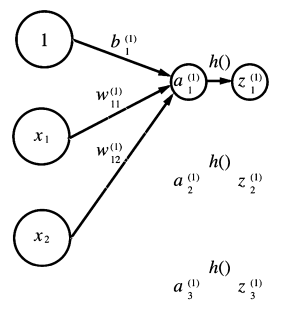

In [46]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(X.shape)
print(W1.shape)
print(B1.shape)
print("")

A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

(2,)
(2, 3)
(3,)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### FROM second (hidden) layer TO third (hidden) layer

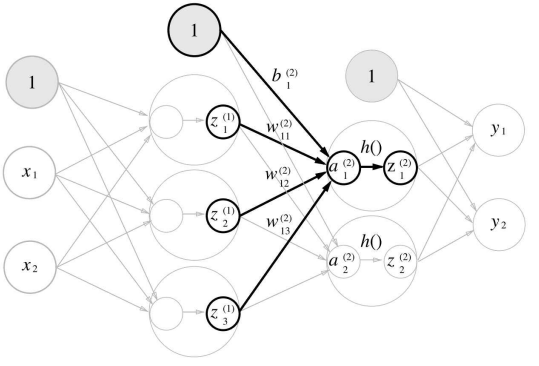

In [47]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### FROM third (hidden) layer TO last (output) layer

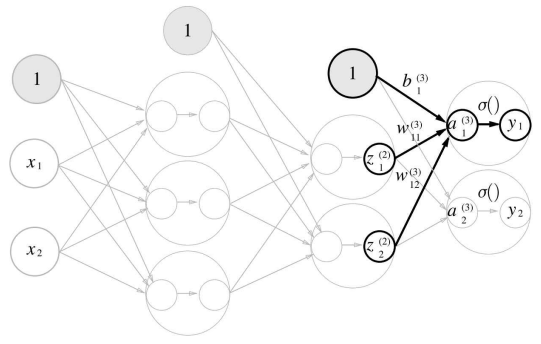

In [48]:
def identity_function(x):
  # 항등 함수. 여기서는 출력층의 활성화 함수로 사용
  return(x)

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


### Network construction

Usual form of neural network module (e.g., TensorFlow, PyTorch, etc.)

In [49]:
def init_network():
  network = {}
  network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network["b1"] = np.array([0.1, 0.2, 0.3])
  network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network["b2"] = np.array([0.1, 0.2])
  network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network["b3"] = np.array([0.1, 0.2])
  return network

def forward(network, x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## Construct Output Layer

### Softmax function

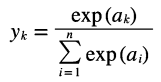

* Identity function is used as activation function in "regression".
* Softmax function is used as activation function in "(multi-class) classification".

In [50]:
# Softmax function
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)
print("")

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
print("")

y = exp_a / sum_exp_a
print(y)

# Functionize softmax
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

[ 1.34985881 18.17414537 54.59815003]

74.1221542101633

[0.01821127 0.24519181 0.73659691]


※ Caution for softmax function implementation: Overflow
* Exponential function sometimes results significantly large value.
* Division between large values can make the calculation unstable.
* def of softmax function should be modified to avoid overflow issue.

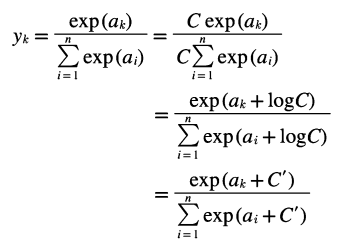

In [51]:
# Avoid overflow
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))
print("")

c = np.max(a)
print(a-c)
print("")

print(np.exp(a - c) / np.sum(np.exp(a - c)))
print("")

# Modified softmax function
def softmax_modified(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # Solution for overflow issue
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

a = np.array([0.3, 2.9, 4.0])
y = softmax_modified(a)
print(y)
print(np.sum(y))

"""
소프트맥스 함수 출력의 총합은 1
다시 말해, 소프트맥스 함수의 출력은 '확률'로 해석할 수 있다
예를 들어 y[0] = 0.018, y[1] = 0.245, y[2] = 0.737인 경우, 세 번째 노드의 '확률'이 가장 높다고 해석할 수 있음
이를 통해 multi-class classification이 가능해짐

하지만, 지수 함수 exp(x)가 단조 증가 함수이기 때문에 원소의 대소 관계 자체가 변하지 않음
즉, 소프트 맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치가 출력층에서 갑자기 달라지지 않음
결과적으로 classification NN에서는 모델의 학습시에만 출력층에서 소프트맥스 함수를 사용
추론(inference) 단계에서는 소프트맥스 함수를 사용하지 않음(지수함수 계산에 대한 효율성 이슈)
"""

[nan nan nan]

[  0 -10 -20]

[9.99954600e-01 4.53978686e-05 2.06106005e-09]

[0.01821127 0.24519181 0.73659691]
1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


"\n소프트맥스 함수 출력의 총합은 1\n다시 말해, 소프트맥스 함수의 출력은 '확률'로 해석할 수 있다\n예를 들어 y[0] = 0.018, y[1] = 0.245, y[2] = 0.737인 경우, 세 번째 노드의 '확률'이 가장 높다고 해석할 수 있음\n이를 통해 multi-class classification이 가능해짐\n\n하지만, 지수 함수 exp(x)가 단조 증가 함수이기 때문에 원소의 대소 관계 자체가 변하지 않음\n즉, 소프트 맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치가 출력층에서 갑자기 달라지지 않음\n결과적으로 classification NN에서는 모델의 학습시에만 출력층에서 소프트맥스 함수를 사용\n추론(inference) 단계에서는 소프트맥스 함수를 사용하지 않음(지수함수 계산에 대한 효율성 이슈)\n"

## Hand-written Digits Classification (Only with Forward Propagation)

### MNIST Dataset
Most famous image dataset for training classification neural network models

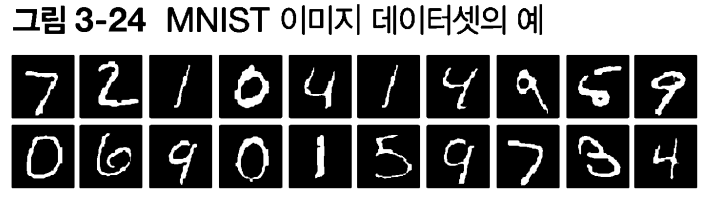

In [31]:
# Run only in the first trial to download MNIST files
# After you downloaded, you can just read locally saved 'pickle' file
import sys, os
ROOT_DIR = os.path.abspath('/content/mount/MyDrive/Colab Notebooks/DL_from_Scratch/Codes') # Copy and paste your directory
sys.path.append(ROOT_DIR)
ROOT_DIR = os.path.abspath('/content/mount/MyDrive/Colab Notebooks/DL_from_Scratch/Codes/Others') # Copy and paste your directory
sys.path.append(ROOT_DIR)
import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [25]:
from PIL import Image # PIL: Python Image Library

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img) # Colab이나 Jupyter 사용시 img_show 작동 안됨. 그냥 확인용이니까 위 이미지 확인하고 넘어가기

5
(784,)
(28, 28)


In [29]:
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 8.0 MB/s 


In [52]:
from pickle5 import pickle

# Functionize
def get_data():
  (x_train, t_train), (x_test, t_test) = mnist.load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("/content/mount/MyDrive/Colab Notebooks/DL_from_Scratch/Codes/Others/sample_weight.pkl", 'rb') as f: # weights and biases are saved in dictionary format
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # Get index with the highest probability
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### Batch Processing

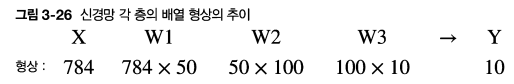

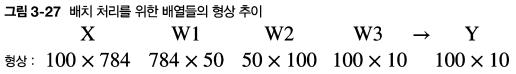

In [55]:
# Structure of single data processing
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
print("")

# Batch data processing
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1) # axis=1: find max value's index in the first dimension of 100*10 array
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)

Accuracy:0.9352
